In [8]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns



rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [9]:
Nsamp=30
modulation_theta=1.05
modulation_kappa=0.7
mode='T'
print("\n \n")
print("lattice sampling...") 

#Lattice parameters 
#lattices with different normalizations
theta=modulation_theta*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
print(f"taking {umkl} umklapps")
VV=lq.boundary()
#kosh params realistic  -- this is the closest to the actual Band Struct used in the paper
# hbvf = 2.1354; # eV
# hvkd=hbvf*q
# kappa_p=0.0797/0.0975
# kappa=kappa_p
# up = 0.0975; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
PH=True

#JY params 
hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
hvkd=hbvf*q
kappa=modulation_kappa
up = 0.105; # eV
u = kappa*up; # eV
alpha=up/hvkd
alph=alpha
#Andrei params 
# hbvf = 19.81/(8*np.pi/3); # eV
# hvkd=hbvf*q
# kappa=1
# up = 0.110; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
print("\n \n")
print("parameters of the hamiltonian...")
print("hbvf is ..",hbvf )
print("q is...", q)
print("hvkd is...", hvkd)
print("kappa is..", kappa)
print("alpha is..", alph)
print("the twist angle is ..", theta)
print("\n \n")
#electron parameters
nbands=2
nremote_bands=0
hbarc=0.1973269804*1e-6 #ev*m
alpha=137.0359895 #fine structure constant
a_graphene=2.458*(1e-10) #in meters this is the lattice constant NOT the carbon-carbon distance
e_el=1.6021766*(10**(-19))  #in joule/ev
ee2=(hbarc/a_graphene)/alpha
eps_inv = 1/10
d_screening=20*(1e-9)/a_graphene
d_screening_norm=d_screening*lq.qnor()
epsilon_0 = 8.85*1e-12
ev_conv = e_el
Vcoul=( e_el*e_el*eps_inv*d_screening/(2*epsilon_0*a_graphene) )
V0= (  Vcoul/lq.Vol_WZ() )/ev_conv
print(V0, 'la energia de coulomb en ev')
print("\n \n")
#phonon parameters
c_light=299792458 #m/s
M=1.99264687992e-26 * (c_light*c_light/e_el) # [in units of eV]
mass=M/(c_light**2) # in ev *s^2/m^2
alpha_ep=0 # in ev
beta_ep=4 #in ev SHOULD ALWAYS BE GREATER THAN ZERO
if mode=="L":
    c_phonon=21400 #m/s
if mode=="T":
    c_phonon=13600 #m/s
else:
    c_phonon=21400 #m/s

#calculating effective coupling
A1mbz=lq.VolMBZ*((q**2)/(a_graphene**2))
AWZ_graphene=np.sqrt(3)*a_graphene*a_graphene/2
A1bz=(2*np.pi)**2 / AWZ_graphene
alpha_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*alpha_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
beta_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*beta_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
alpha_ep_effective_tilde=alpha_ep_effective/beta_ep_effective
beta_ep_effective_tilde=beta_ep_effective/beta_ep_effective

#testing the orders of magnitude for the dimensionless velocity squared
qq=q/a_graphene
Wupsilon=(beta_ep_effective**2)*qq*qq
W=0.008
#ctilde=W*(qq**2)*(mass)*(c_phonon**2)/Wupsilon
print("phonon params", Wupsilon )
print("phonon params upsilon", Wupsilon/W )
print("area ratio", A1mbz/A1bz, (2*np.sin(theta/2))**2   )
print("correct factor by which the interaction is reduced",np.sqrt(2)/(2*np.sin(theta/2)))
print("c tilde",np.sqrt((Wupsilon/W)*(1/(qq**2))*(1/mass) ))
print("\n \n")
    
#parameters to be passed to the Bubble class
mode_layer_symmetry="a" #whether we are looking at the symmetric or the antisymmetric mode
cons=[alpha_ep_effective_tilde,beta_ep_effective_tilde, Wupsilon, a_graphene, mass] #constants used in the bubble calculation and data anlysis

#rescaling coupling constant
rf=1.75
gp2=(rf)**2
print(beta_ep*rf) #rescaling so that the coupling is given by
    
    


 

lattice sampling...
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03489375114440918  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03417325019836426  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
taking 0 umklapps

 

parameters of the hamiltonian...
hbvf is .. 2.3382685902179845
q is... 0.07676251561000431
hvkd is... 0.17949137915699082
kappa is.. 0.7
alpha is.. 0.5849863123964439
the twist angle is .. 0.01832595714594046

 

0.11619672932818317 la energia de coulomb en ev

 

phonon params 262026856138636.84
phonon params upsilon 3.2753357017329604e+16
area ratio 0.0003358313063384534 0.0003358313063384533
correct factor by which the interaction is reduced 77.17104983428196
c tilde 1643.2385314028643

 

In [10]:
kappa=0.3
path=pathy+'/data/thetasweep_k03_HF_2022-07-04-21-12-09'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_T_')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=30
    theta=dff['theta'][0]
    c6sym=True
    umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2


df03=pd.concat(frames).sort_values(['theta', 'nu'])




['thetasweep_1.05', 'thetasweep_k03_2_1.09', 'thetasweep_1.04', 'thetasweep_1.01', 'thetasweep_k03_2_1.0', 'thetasweep_1.07', 'thetasweep_k03_2_1.1', 'thetasweep_k03_2_1.11', 'thetasweep_k03_2_0.98', 'thetasweep_1.02', 'thetasweep_k03_2_0.99', 'thetasweep_1.03', 'thetasweep_1.06', 'thetasweep_k03_2_1.08', 'inforun']
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03438711166381836  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03525042533874512  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.032976627349853516  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice p

In [11]:
kappa=0.5
path=pathy+'/data/thetasweep_k05_HF_2022-07-04-20-44-24'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_T_')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=30
    theta=dff['theta'][0]
    c6sym=True
    umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2


df05=pd.concat(frames).sort_values(['theta', 'nu'])




['thetasweep_k05_2_0.99', 'thetasweep_k05_2_1.0', 'thetasweep_1.05', 'thetasweep_k05_2_1.08', 'thetasweep_1.04', 'thetasweep_k05_2_1.11', 'thetasweep_1.01', 'thetasweep_1.07', 'thetasweep_k05_2_1.1', 'thetasweep_k05_2_0.98', 'thetasweep_k05_2_1.09', 'thetasweep_1.02', 'thetasweep_1.03', 'thetasweep_1.06', 'inforun']
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.044658660888671875  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03339433670043945  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03341865539550781  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice p

In [12]:
kappa=0.7
path=pathy+'/data/thetasweep_k07_HF_2022-07-04-17-51-30'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_T_')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=30
    theta=dff['theta'][0]
    c6sym=True
    umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2


df07=pd.concat(frames).sort_values(['theta', 'nu'])




['thetasweep_k05_2_0.99', 'thetasweep_k05_2_1.0', 'thetasweep_1.05', 'thetasweep_k05_2_1.08', 'thetasweep_1.04', 'thetasweep_k05_2_1.11', 'thetasweep_1.01', 'thetasweep_1.07', 'thetasweep_k05_2_1.1', 'thetasweep_k05_2_0.98', 'thetasweep_k05_2_1.09', 'thetasweep_1.02', 'thetasweep_1.03', 'thetasweep_1.06', 'inforun']
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.04167032241821289  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03309297561645508  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03333401679992676  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice po

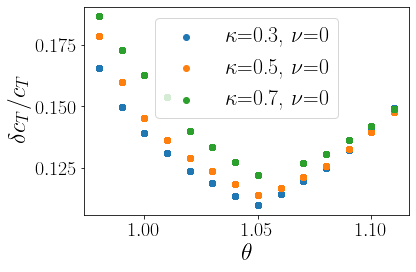

In [32]:
plt.scatter(df03['theta']*180/np.pi,df03['delt_cph']/13600,label=r'$\kappa$=0.3, $\nu$=0')
plt.scatter(df05['theta']*180/np.pi,df05['delt_cph']/13600,label=r'$\kappa$=0.5, $\nu$=0')

thetaarr=np.sort(np.array(df07['theta'].unique()))
df2=df07.loc[df07['theta'] != thetaarr[8]]
plt.scatter(df2['theta']*180/np.pi,df2['delt_cph']/13600,label=r'$\kappa$=0.7, $\nu$=0')
plt.legend(fontsize=22)

plt.xticks(size=20)
plt.yticks(size=20)

plt.ylabel(r'$\delta c_T /c_T$', size=24)
plt.xlabel(r'$\theta$', size=24)
plt.locator_params(axis='y', nbins=4)
    
plt.locator_params(axis='x', nbins=4)
plt.tight_layout()
plt.savefig('imgs/renorm_HF.png', dpi=400)